Let’s simulate mutations during PCR. Assume your are amplifying a sequence of L = 100 base pairs starting from a single sequence. Each PCR cycle the number of molecules doubles, and the entire amplification consists of n = 13 cycles. At each duplication event, every base pair is copied correctly with probability 1−µ or replaced by a different nucleotide with probability µ; all three possible substitutions occur at equal probability µ/3. In this problem, we will explore three values of µ: 10−4 , 10−3 , and 10−2 . For simplicity, we assume that only the new strand could be mutated; the parent strand maintains its original state after duplication.
For each mutation rate do the following. Determine the expected number of distinct sequences at the end of the PCR. Visualize the distribution of relative abundances of these sequences. Compute the effective number of sequences using the definition based on entropy.

Optional (You may do this part for extra 5 points)
Find the confidence interval for the expected number of distinct sequences, for a confidence level c. You may choose any confidence level as you like. Explain which distribution did you use, standard normal or t?
Explain your choice. You may do this only for µ: 10−4.

In [110]:
import random 
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

def mutate_or_not(new_base,p_change): 
    # Generate a number from 0 to 9999 with equal probability
    r = random.randint(0, 9999)
     
    #  r is smaller than px with probability p_change/100
    if (r < p_change):
        new_base = which_base(new_base) # if we return 0 this means we need to change the base
        #print('change')
        return new_base
    # r is greater than p_change with a probability (1-p_change)/100
    # or equal to 100 with probability pz/100
    else:
        #print('no change')
        return new_base 
    

def which_base(new_base): 
    all_substitutions = ['A','T','G','C']
    all_substitutions.remove(new_base)
    # Generate a number from 1 to 3 with equal probability
    r = random.randint(1, 3)
    #print('selecting base')
    if r == 1:
        return all_substitutions[0] 
         
    elif r == 2:
        return all_substitutions[1]
    
    else:
        return all_substitutions[2] 


def PCR_new(p_change, number_of_cycles, dna):
    total_rep = []
    for i in range(2**number_of_cycles):
        replicate = ''
        for j in range(len(dna)):
            base = dna[j]
            base = mutate_or_not(base,p_change)
            replicate += base
        total_rep.append(replicate)
    return total_rep

# we will match our PCR replicates with the oiginal DNA stand and the complement of the oiginal DNA Strand
# if we get a mismatch with both of these, this means that it is distinct because mutation has occured in that replicate


# we are converting the probabilities (multiply by 10000) and then using them in the code
p_change_list = [1, 10, 100]

# mentioning the number of cycles of PCR
number_of_cycles = 13

# this helps in generating complement of our sequence
complement = {'A':'T','T':'A','G':'C','C':'G'}

# generating a random DNA sequence of 100 bases
bases = ['A','T','G','C']
dna = ''
complement_dna = ''
for i in range(100):
    base = bases[random.randint(0,3)]
    dna += base
    # generating the complement sequence of our original strand (will help us at the time of finding distinct sequences)
    complement_dna += complement[base]
  

In [111]:
# calling PCR function for probability 10^-4
PCR_replicates = PCR_new(p_change_list[0], number_of_cycles, dna)
len(PCR_replicates)

8192

In [112]:
# finding the types of unique replicates generated in 13 cycles of PCR
unique_replicates = set()
for replicate in PCR_replicates:
    unique_replicates.add(replicate)
print(f'There are {len(unique_replicates)} unique replicates')

There are 67 unique replicates


In [113]:
# finding count of each of the unique replicate
unique_replicates_count = {}
for unique_rep in unique_replicates:
    if unique_rep == dna :
        unique_replicates_count['parent'] = 0
    else:
        unique_replicates_count[unique_rep] = 0

for replicate in PCR_replicates:
    if replicate == dna:
        unique_replicates_count['parent'] += 1
    else:
        unique_replicates_count[replicate] += 1
#print(unique_replicates_count)


In [114]:
l1 = [unique_replicates_count[key] for key in unique_replicates_count]
print(l1)

[1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8116, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1]


In [115]:
# finding relative count of each of the unique replicate
total_replicates = 2 ** number_of_cycles
unique_replicates_relative_count = {}
for key in unique_replicates_count:
    unique_replicates_relative_count[key] = unique_replicates_count[key]/total_replicates
print(unique_replicates_relative_count)

{'CATCTAGTCAGGATGCGAAACACGAGGAAGCTGAGTTGCCTCTCTCCCGGTGCAGCAACACCACGAACCCGTGAGAATCTTGGTAGTTAGCCAGCGTACG': 0.0001220703125, 'CATCTAGTCAGGATCCGAAACACGAGGAAGCTGAGTGGCCTCTCTCCCGGTGCAGCAACACCACGAACCCGTGAGAATCTTGGTAGTTAGCCAGCGTACG': 0.0001220703125, 'CATCTAGTCAGGATGCGAAACACGAGGAAGCTGAGTGGCCTCTCTCCCGGTGCAGCAACACGACGAACCCGTGAGAATCTTGGTAGTTAGCCAGCGTACG': 0.0001220703125, 'CATCTAATCAGGATGCGAAACACGAGGAAGCTGAGTGGCCTCTCTCCCGGTGCAGCAACACCACGAACCCGTGAGAATCTTGGTAGTTAGCCAGCGTACG': 0.000244140625, 'CATCTAGTCAGGATGCGAAACACGAGGAAGCTGAGTGGCCTCTCTCCCGGTGCAGCAACACTACGAACCCGTGAGAATCTTGGTAGTTAGCCAGCGTACG': 0.0001220703125, 'CATCTAGTCAGGATGCGAAACACGAGGAAGCTGAGTGGCCTCTCCCCCGGTGCAGCAACACCACGAACCCGTGAGAATCTTGGTAGTTAGCCAGCGTACG': 0.000244140625, 'CATCTAGTCAGGATGCGAAACACGAGTAAGCTGAGTGGCCTCTCTCCCGGTGCAGCAACACCACGAACCCGTGAGAATCTTGGTAGTTAGCCAGCGTACG': 0.0001220703125, 'CATCTAGTCAGGATGCGAAACACGAGGAAGCTGAGTGGCCTCTCTCCCGGCGCAGCAACACCACGAACCCGTGAGAATCTTGGTAGTTAGCCAGCGTACG': 0.0001220703125, 'CATCTAGTCAGGATGCGAAACACGAGGAAGCT

In [116]:
list_of_relative_counts = [unique_replicates_relative_count[key] for key in unique_replicates_relative_count]
list_of_relative_counts.sort(reverse=True)
print(list_of_relative_counts)

[0.99072265625, 0.0003662109375, 0.0003662109375, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.000244140625, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.0001220703125, 0.00

Text(0, 0.5, 'Relative Count')

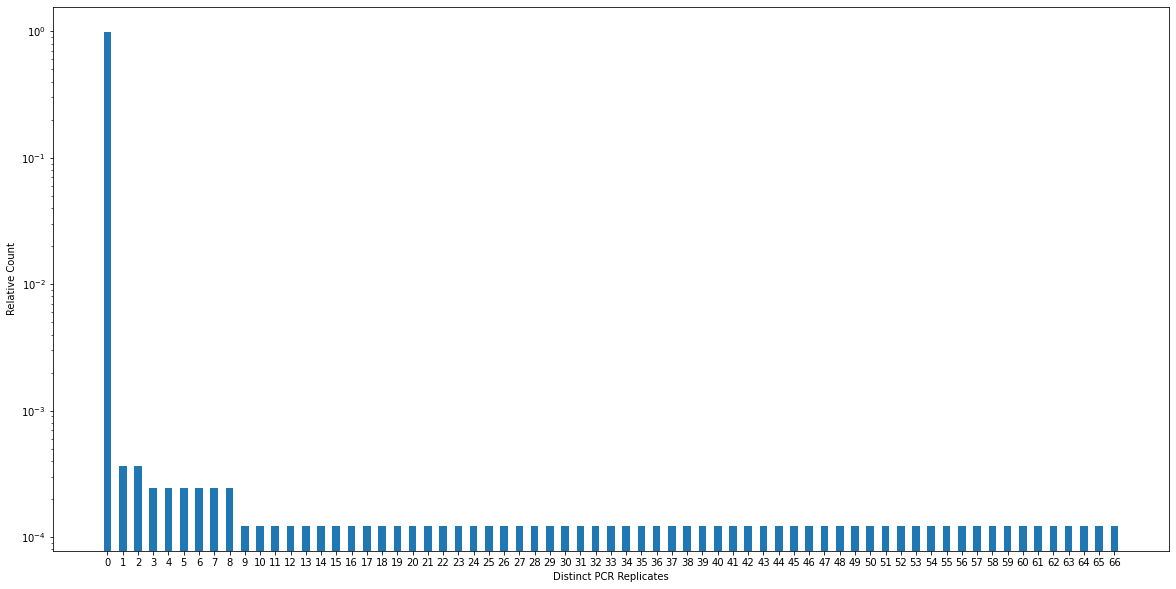

In [117]:
# visualizing the distribution of relative abundance of distinct sequences

x_axis = range(0,len(list_of_relative_counts))
x_axis
plt.figure(figsize=(20,10))
plt.bar(x_axis, list_of_relative_counts, width = 0.5)
plt.xticks(range(0,len(unique_replicates)))
plt.yscale('log')
plt.xlabel('Distinct PCR Replicates')
plt.ylabel('Relative Count')

In [118]:
l2 = []
for i in range(50):
    PCR_replicates = PCR_new(p_change_list[0], number_of_cycles, dna)
    
    # finding the types of unique replicates generated in 13 cycles of PCR
    unique_replicates = set()
    for replicate in PCR_replicates:
        unique_replicates.add(replicate)
    #print(f'There are {len(unique_replicates)} unique replicates')
    l2.append(len(unique_replicates))
print(l2)  

[63, 58, 80, 71, 79, 80, 68, 67, 74, 73, 69, 69, 70, 64, 61, 75, 72, 68, 69, 67, 67, 80, 82, 73, 74, 73, 68, 82, 72, 74, 84, 81, 68, 71, 68, 54, 78, 63, 58, 68, 76, 77, 76, 72, 74, 76, 78, 72, 84, 87]


In [119]:
# to find the mean and standard deviation
mean = np.mean(l2)
std = np.std(l2)
print('The mean was found to be ' ,mean)
print('The std deviation was found to be' ,std)

The mean was found to be  72.14
The std deviation was found to be 7.034230590476828


In [120]:
# to calculate the confidence interval for 95%
confidence_interval = st.t.interval(alpha=0.95, df=len(l2)-1, loc=np.mean(l2), scale=st.sem(l2))
print(f'Confidence interval for expected number of distinct replicates is {confidence_interval}')

Confidence interval for expected number of distinct replicates is (70.12059777309877, 74.15940222690124)


In [121]:
# to calculate the enropy
entropy_test = 0
for key in unique_replicates_relative_count:
    entropy = unique_replicates_relative_count[key] * math.log(unique_replicates_relative_count[key])
    entropy_test += round(entropy,4)
entropy_test = -1 *entropy_test
print('Entropy is' ,entropy_test)

Entropy is 0.09080000000000002


In [122]:
# to calculate the number of effective replicates
Neff_unique_rep = math.exp(entropy_test)
print('The number of effective replicates is' ,Neff_unique_rep)

The number of effective replicates is 1.0950499733613335


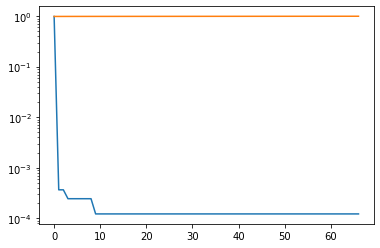

In [123]:
# to plot a T distribution
cdf=np.cumsum(list_of_relative_counts)
plt.plot(list_of_relative_counts)
plt.plot(cdf)
plt.yscale('log')

We use a T distribution when we do not know the population mean as well as the standard deviation, and here we don't know that. It also used when the sample size is small/less, as I am not doing for a huge data I used T distribution and assumed it to be a perfect choice.

# For probability 10^-3

There are 325 unique replicates
Entropy is 0.8587
The number of effective replicates is 2.360090580809734


Text(0, 0.5, 'Relative Count')

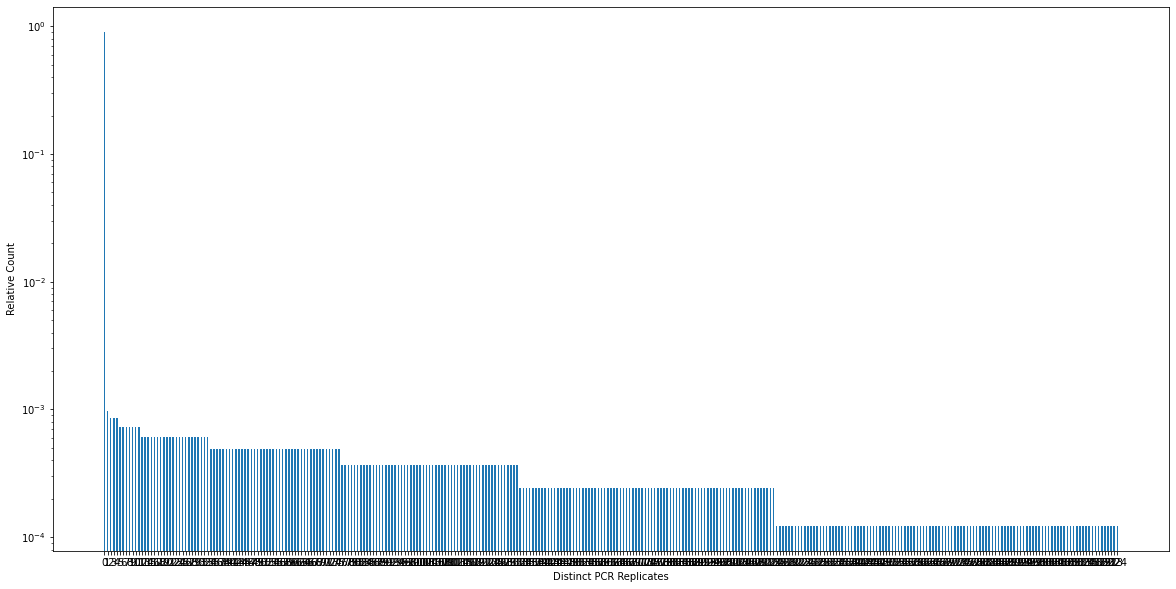

In [124]:
# calling PCR function for probability 10^-3
PCR_replicates = PCR_new(p_change_list[1], number_of_cycles, dna)

# finding the types of unique replicates generated in 13 cycles of PCR
unique_replicates = set()
for replicate in PCR_replicates:
    unique_replicates.add(replicate)
print(f'There are {len(unique_replicates)} unique replicates')

# finding count of each of the unique replicate
unique_replicates_count = {}
for unique_rep in unique_replicates:
    if unique_rep == dna or unique_rep == complement_dna:
        unique_replicates_count['parent'] = 0
    else:
        unique_replicates_count[unique_rep] = 0

for replicate in PCR_replicates:
    if replicate == dna or replicate == complement_dna:
        unique_replicates_count['parent'] += 1
    else:
        unique_replicates_count[replicate] += 1
#print(unique_replicates_count)

# finding relative count of each of the unique replicate
total_replicates = 2 ** number_of_cycles
unique_replicates_relative_count = {}
for key in unique_replicates_count:
    unique_replicates_relative_count[key] = unique_replicates_count[key]/total_replicates
#print(unique_replicates_relative_count)

list_of_relative_counts = [unique_replicates_relative_count[key] for key in unique_replicates_relative_count]
list_of_relative_counts.sort(reverse=True)
#print(list_of_relative_counts)

# finding the entropy for each distinct species
entropy_test = 0
for key in unique_replicates_relative_count:
    entropy = unique_replicates_relative_count[key] * math.log(unique_replicates_relative_count[key])
    entropy_test += round(entropy,4)
entropy_test = -1 *entropy_test
print('Entropy is' ,entropy_test)

# to calculate the number of effective replicates
Neff_unique_rep = math.exp(entropy_test)
print('The number of effective replicates is' ,Neff_unique_rep)

# visualizing the distribution of relative abundance of distinct sequences
x_axis = range(0,len(list_of_relative_counts))
x_axis
plt.figure(figsize=(20,10))
plt.bar(x_axis, list_of_relative_counts, width = 0.5)
plt.xticks(range(0,len(unique_replicates)))
plt.yscale('log')
plt.xlabel('Distinct PCR Replicates')
plt.ylabel('Relative Count')

# For probability 10 ^-2

There are 2468 unique replicates
Entropy is 5.17880000000018
The number of effective replicates is 177.46971950067098


Text(0, 0.5, 'Relative Count')

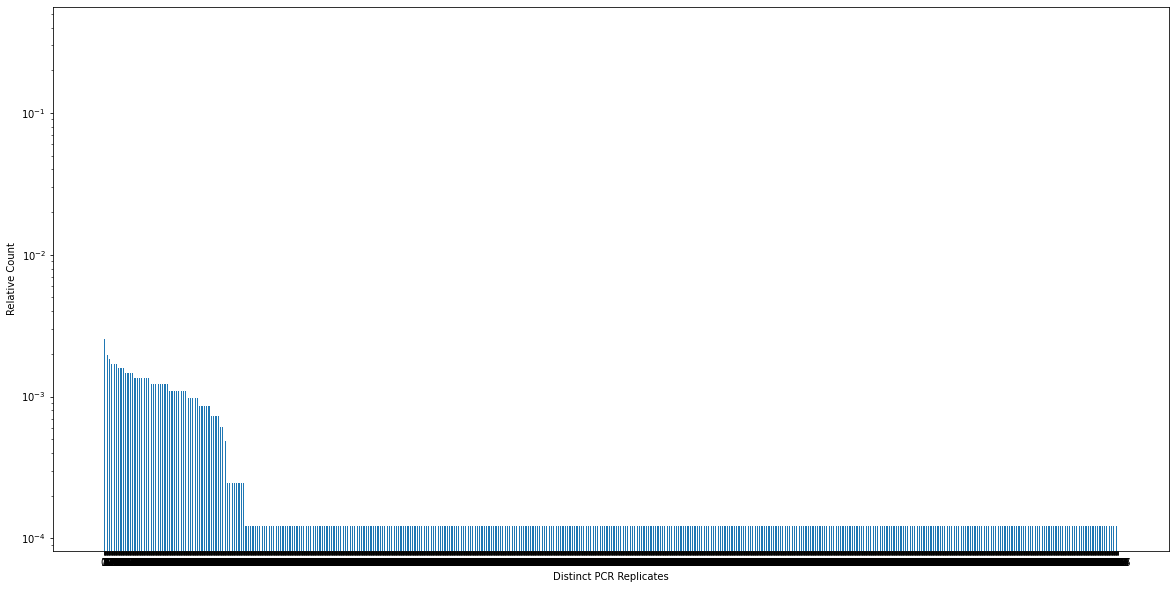

In [125]:
# calling PCR function for probability 10^-3
PCR_replicates = PCR_new(p_change_list[2], number_of_cycles, dna)

# finding the types of unique replicates generated in 13 cycles of PCR
unique_replicates = set()
for replicate in PCR_replicates:
    unique_replicates.add(replicate)
print(f'There are {len(unique_replicates)} unique replicates')

# finding count of each of the unique replicate
unique_replicates_count = {}
for unique_rep in unique_replicates:
    if unique_rep == dna or unique_rep == complement_dna:
        unique_replicates_count['parent'] = 0
    else:
        unique_replicates_count[unique_rep] = 0

for replicate in PCR_replicates:
    if replicate == dna or replicate == complement_dna:
        unique_replicates_count['parent'] += 1
    else:
        unique_replicates_count[replicate] += 1

#print(unique_replicates_count)

# finding relative count of each of the unique replicate
total_replicates = 2 ** number_of_cycles
unique_replicates_relative_count = {}
for key in unique_replicates_count:
    unique_replicates_relative_count[key] = unique_replicates_count[key]/total_replicates
#print(unique_replicates_relative_count)

list_of_relative_counts = [unique_replicates_relative_count[key] for key in unique_replicates_relative_count]
list_of_relative_counts.sort(reverse=True)
#print(list_of_relative_counts)

# finding the entropy for each distinct species
entropy_test = 0
for key in unique_replicates_relative_count:
    entropy = unique_replicates_relative_count[key] * math.log(unique_replicates_relative_count[key])
    entropy_test += round(entropy,4)
entropy_test = -1 *entropy_test
print('Entropy is' ,entropy_test)

# to calculate the number of effective replicates
Neff_unique_rep = math.exp(entropy_test)
print('The number of effective replicates is' ,Neff_unique_rep)

# visualizing the distribution of relative abundance of distinct sequences
x_axis = range(0,len(list_of_relative_counts))
x_axis
plt.figure(figsize=(20,10))
plt.bar(x_axis, list_of_relative_counts, width = 0.5)
plt.xticks(range(0,len(unique_replicates)))
plt.yscale('log')
plt.xlabel('Distinct PCR Replicates')
plt.ylabel('Relative Count')

In [126]:
#z = 0
#for i in range(800000):
#    r = random.randint(0, 9999)
#    if r < 1:
#        z += 1
#print(z)